In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
path = 'result_ST/dp1_0_dp2_0/performance_tmp.csv'
performance = pd.read_csv(path)

In [ ]:
max_val_r2 = performance['val_r2'].max()
performance_val_r2 = performance[performance['val_r2']==max_val_r2]

In [ ]:
max_auprc = performance_val_r2['AUPRC'].max()
performance_auprc = performance_val_r2[performance_val_r2['AUPRC']==max_auprc]

In [4]:
alpha = [0.6,0.7,0.8,0.9]
# 构建文件路径
dp_name = "dp1_0.05_dp2_0"
dp_best = []
for al in alpha:
    PATH = f"result_LA_threshold_1_alpha_{al}"
    path = os.path.join(PATH,dp_name,'performance_tmp.csv')
    performance = pd.read_csv(path)
    # 优先满足val_r2的值, 即val_r2要最大
    max_val_r2 = performance['val_r2'].max()
    performance_val_r2 = performance[performance['val_r2']==max_val_r2]
    # 其次满足auprc最大
    max_auprc = performance_val_r2['AUPRC'].max()
    performance_auprc = performance_val_r2[performance_val_r2['AUPRC']==max_auprc]
    performance_auprc['alpha'] = al
    dp_best.append(performance_auprc)
    
    threshold_1_dp_best = pd.concat(dp_best, ignore_index=True)

threshold_1_dp_best
# # 存储到一个新的 CSV 文件中
# output_path = os.path.join(PATH, 'dp_best.csv')
# dp_best.to_csv(output_path, index=False)

/tmp/ipykernel_261145/1558536892.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_auprc['alpha'] = al
/tmp/ipykernel_261145/1558536892.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_auprc['alpha'] = al
/tmp/ipykernel_261145/1558536892.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,Unnamed: 0,network_type,cv,weight_decay,refit,num_train_ksr,num_test_ksr,AUPRC,AUROC,MCC,...,FP,FN,train_loss,val_loss,val_r2,activation,drop_p_prior,drop_p_kki,drop_p_ksr,alpha
0,196,cpd,2,1.000000e-10,9.0,74575,18486,0.191452,0.588859,0.126296,...,56573.0,9739.0,0.011281,0.012009,0.889713,ReLU0,0.05,0,0,0.6
1,416,cpd,4,1.000000e-04,9.0,74466,18595,0.245199,0.628970,0.191221,...,32263.0,10575.0,0.011381,0.011993,0.889851,ReLU0,0.05,0,0,0.7
2,374,cpd,4,1.000000e-07,NaN,74466,18595,0.206809,0.672262,0.195633,...,114792.0,3309.0,0.012072,0.010986,0.897084,ReLU0,0.05,0,0,0.8
3,352,cpd,4,1.000000e-10,NaN,74466,18595,0.207069,0.661074,0.182825,...,110877.0,4022.0,0.010402,0.009497,0.911022,ReLU0,0.05,0,0,0.9


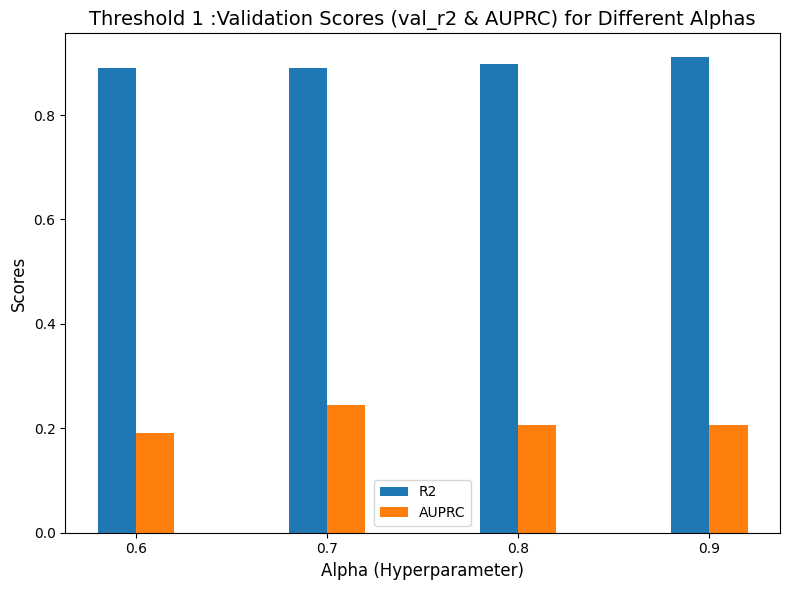

In [8]:
val_r2 = threshold_1_dp_best['val_r2']
auprc = threshold_1_dp_best['AUPRC']
alpha = threshold_1_dp_best['alpha']

plt.figure(figsize=(8, 6))
bar_width = 0.2 

x = range(len(alpha))
plt.bar(x, val_r2, width=bar_width, label='R2')
plt.bar([i + bar_width for i in x], auprc, width=bar_width, label='AUPRC')

# 添加标签
plt.xlabel('Alpha (Hyperparameter)', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Threshold 1 :Validation Scores (val_r2 & AUPRC) for Different Alphas', fontsize=14)
plt.xticks([i + bar_width / 2 for i in x], alpha)
plt.legend()

# 显示图表
plt.tight_layout()
plt.show()

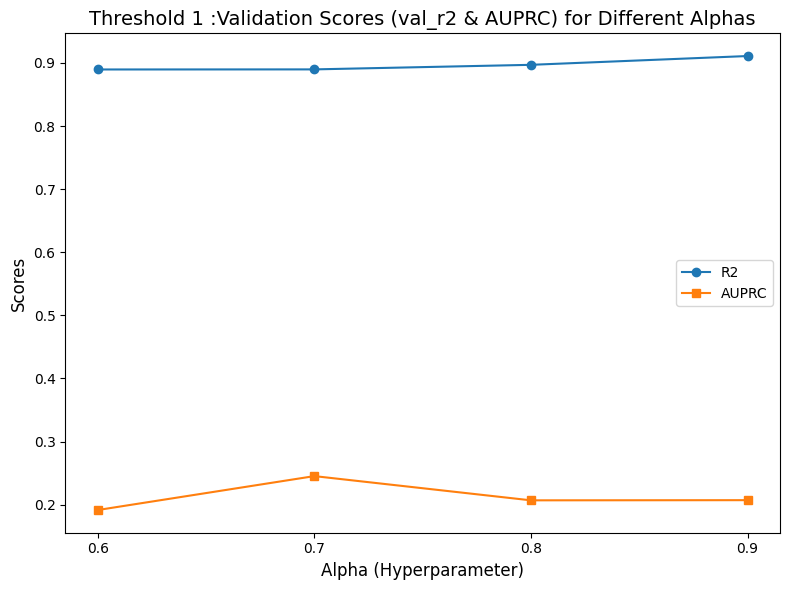

In [9]:
# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(alpha, val_r2, marker='o', label='R2')
plt.plot(alpha, auprc, marker='s', label='AUPRC')

# 添加标签
plt.xlabel('Alpha (Hyperparameter)', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Threshold 1 :Validation Scores (val_r2 & AUPRC) for Different Alphas', fontsize=14)
plt.xticks(alpha)
plt.legend()

# 显示图表
plt.tight_layout()
plt.show()